<a href="https://colab.research.google.com/github/tanviablash/Prasunet_DS/blob/main/Prasunet_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **VISUALISING SENTIMENT PATTERNS USING THE TWITTER SENTIMENT ANALYSIS DATASET**

In [13]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Loading the datasets
train_data = pd.read_csv('/content/twitter_training.csv')
validation_data = pd.read_csv('/content/twitter_validation.csv')

# Checking the first few rows
print(train_data.head())
print(validation_data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
   3364   Facebook Irrelevant  \
0   352     Amazon    Neutral   
1  8312  Microsoft   Negative   
2  4371      CS-GO   Negative   
3  4433     Google    Neutral   
4  6273       FIFA   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
0

**Word Cloud for Sentiments**

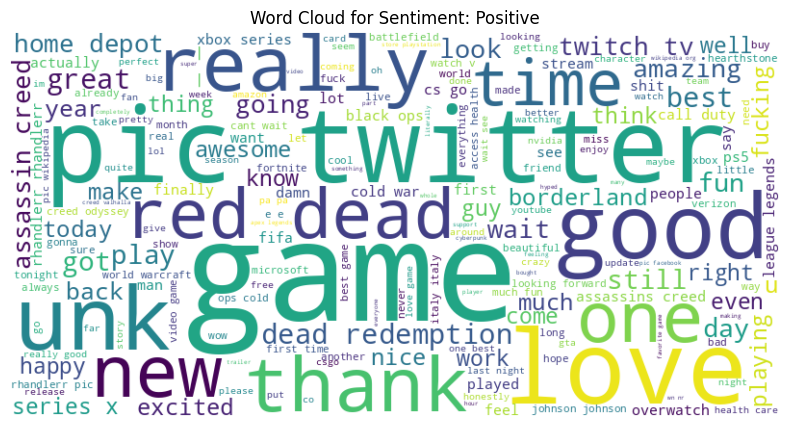

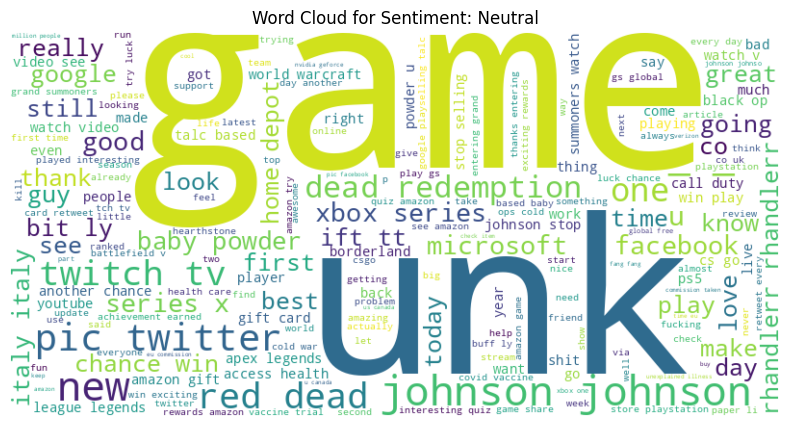

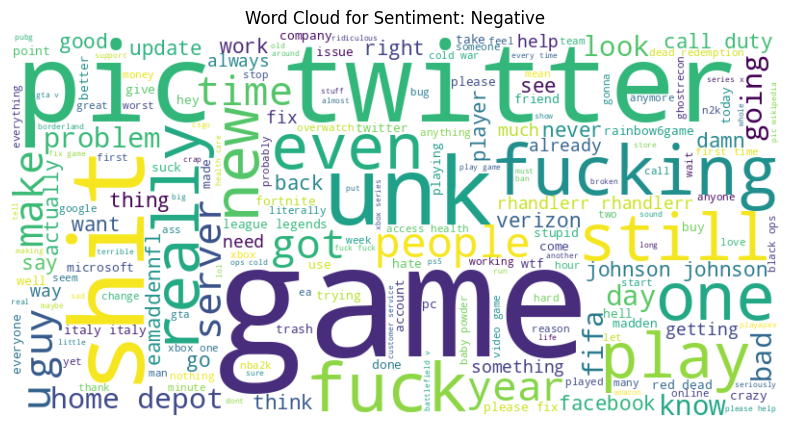

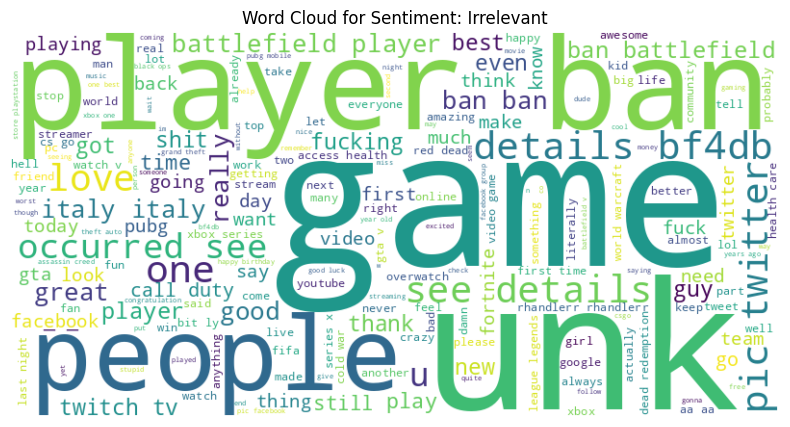

In [24]:
from wordcloud import WordCloud

for sentiment in train_data['sentiment'].unique():
    plt.figure(figsize=(10, 5))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_data[train_data['sentiment'] == sentiment]['cleaned_text']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Sentiment: {sentiment}')
    plt.show()

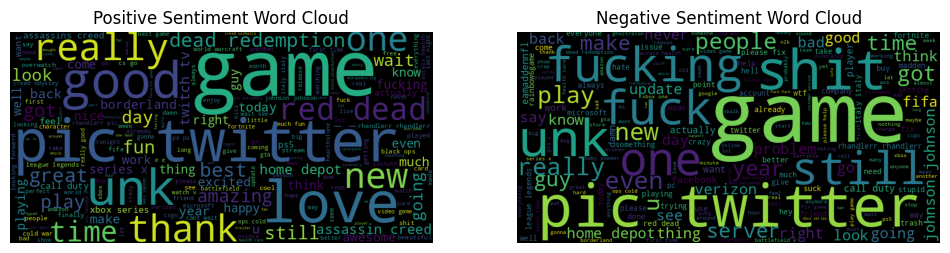

In [31]:
positive_words = ' '.join(train_data[train_data['sentiment'] == 'Positive']['cleaned_text'])
negative_words = ' '.join(train_data[train_data['sentiment'] == 'Negative']['cleaned_text'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=800, height=400).generate(positive_words))
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=800, height=400).generate(negative_words))
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')

plt.show()

**Data Exploration**

In [15]:
train_data.columns = ['id', 'topic', 'sentiment', 'text']
sentiment_counts = train_data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [16]:
print(train_data.isnull().sum())

id             0
topic          0
sentiment      0
text         686
dtype: int64


In [17]:
# Removing duplicates and handling any missing values
train_data.drop_duplicates(inplace=True)
train_data.dropna(subset=['text', 'sentiment'], inplace=True)

**SENTIMENT ANALYSIS**

**DATA VISULISATION**

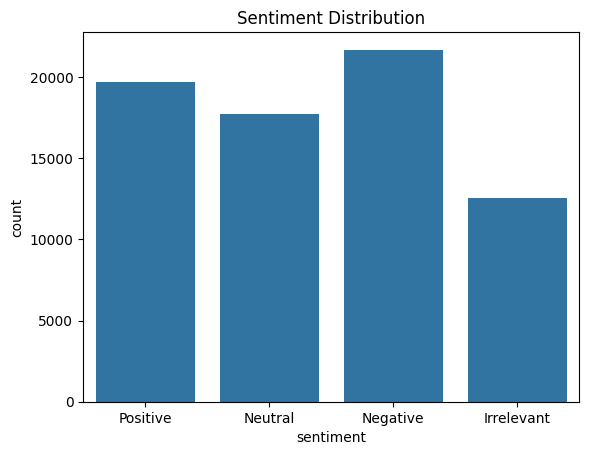

In [19]:
sns.countplot(data=train_data, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

**Text Preprocessing**

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

train_data['cleaned_text'] = train_data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


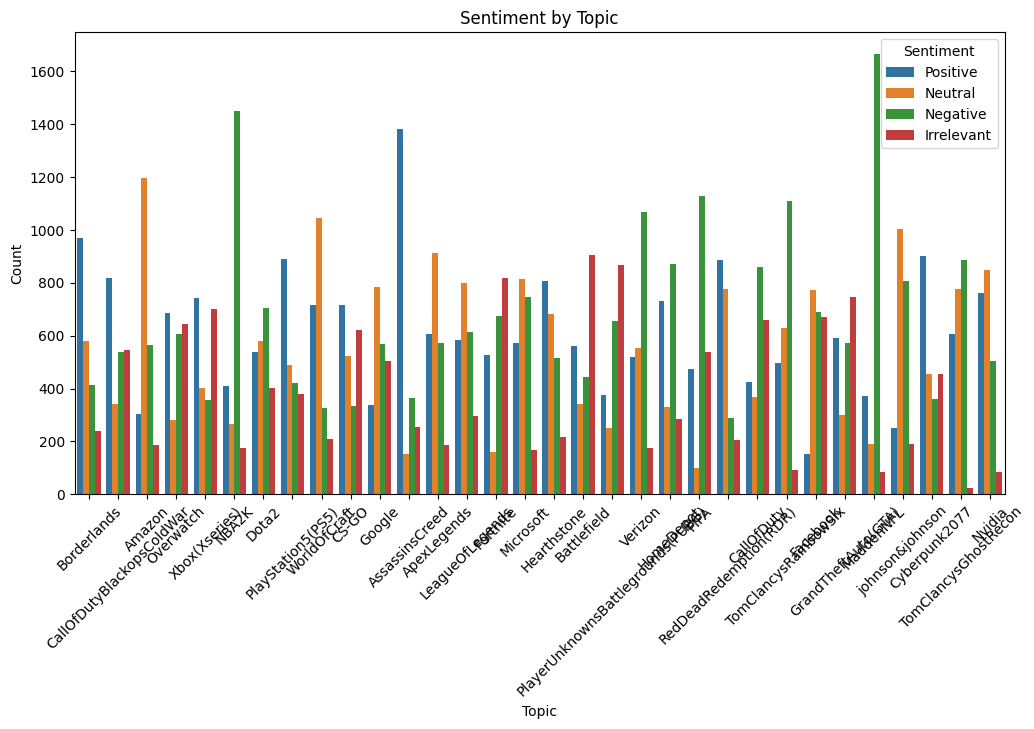

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='topic', hue='sentiment', data=train_data)
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

**Sentiment Score Analysis**

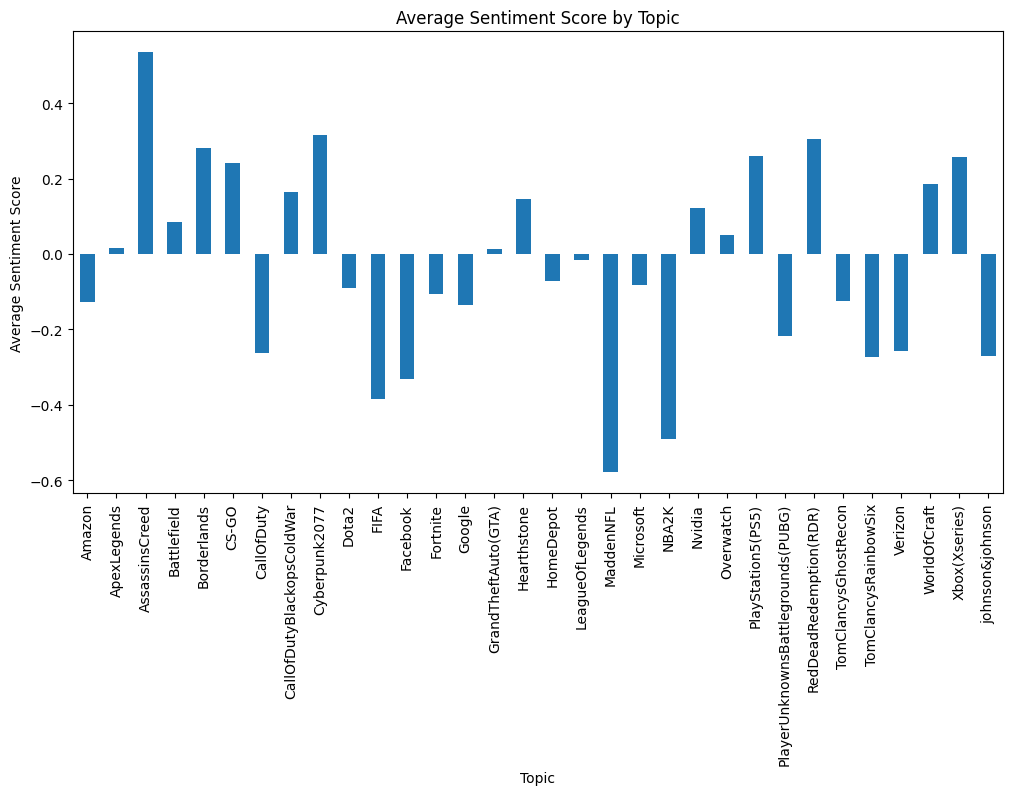

In [30]:
train_data['sentiment_score'] = train_data['sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})
avg_sentiment_by_topic = train_data.groupby('topic')['sentiment_score'].mean()

avg_sentiment_by_topic.plot(kind='bar', figsize=(12, 6))
plt.title('Average Sentiment Score by Topic')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.show()